In [95]:
import json

import graspy as gp
import networkx as nx 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from twins import load_dataset
from pathlib import Path

from nilearn.plotting import plot_connectome, find_parcellation_cut_coords
# from matplotlib import rc
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
# ## for Palatino and other serif fonts use:
# #rc('font',**{'family':'serif','serif':['Palatino']})
# rc('text', usetex=True)

%matplotlib inline

In [44]:
with open("../../data/desikan_space-MNI152NLin6_res-1x1x1.json", 'rb') as f:
    data = json.load(f)

centers = np.array([data[str(i)]['center'] for i in range(1, 71)])

In [98]:
desikan_labels = pd.read_csv('../../data/desikan_labels.csv')
desikan_labels = desikan_labels.sort_values('name')

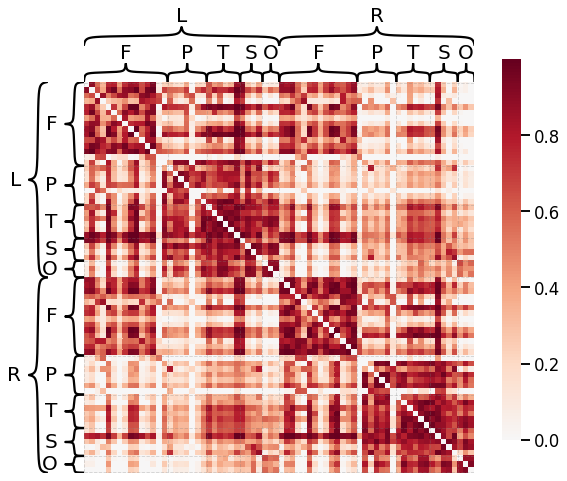

In [103]:
graspy.plot.heatmap(
    ptr, 
    inner_hier_labels=desikan_labels.lobe, 
    outer_hier_labels=desikan_labels.hemisphere,
    hier_label_fontsize=20
)

In [14]:
desikan_labels = pd.read_csv('../../data/desikan_labels.csv')
graphs, _ = load_dataset(Path("/Users/j1c/git/twins/data"), 'desikan', preprocess=None, ptr=None)

g = np.array([val for key, val in graphs.items()])
m = g.mean(axis=0)
ptr = graspy.utils.pass_to_ranks(m, 'simple-nonzero')

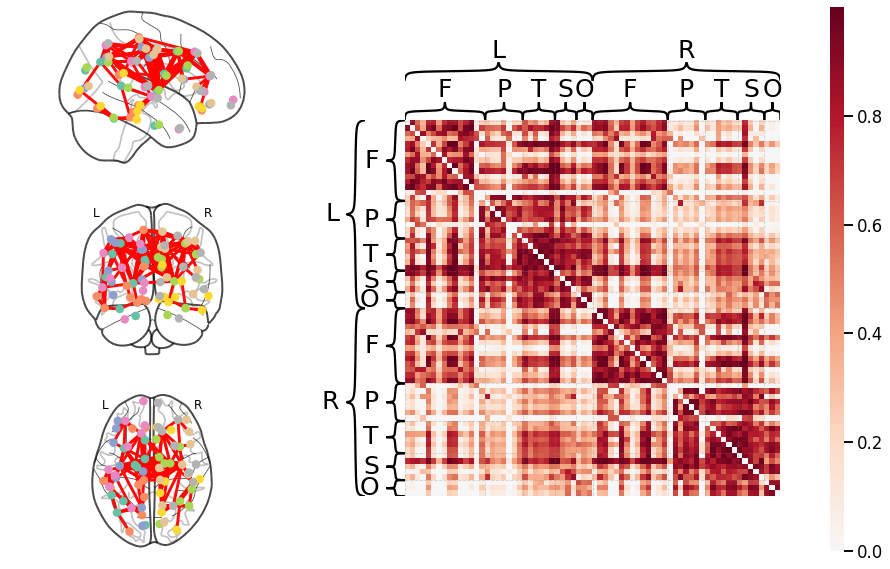

In [133]:
fig = plt.figure(
    #constrained_layout=True, 
    figsize=(15, 10)
)
gs = fig.add_gridspec(3, 3, width_ratios=[1, 1.5, .05])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[:, 1])
ax5 = fig.add_subplot(gs[:, -1])

#for ax, mode in zip([ax1, ax2, ax3], ['l', 'z', 'r']):
for ax, mode in zip([ax1, ax2, ax3], ['x', 'y', 'z']):
    plot_connectome(
        ptr, 
        node_coords=centers,
        display_mode=mode,
        edge_threshold="95%",
        axes=ax
    )

graspy.plot.heatmap(
    ptr, 
    inner_hier_labels=desikan_labels.lobe, 
    outer_hier_labels=desikan_labels.hemisphere,
    hier_label_fontsize=25,
    ax=ax4,
    cbar_ax=ax5
)

In [ ]:
fig = plt.figure(
    #constrained_layout=True, 
    figsize=(17, 8)
)
gs = fig.add_gridspec(2, 4, width_ratios=[1, 1, 2, .05])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[:, 2])
ax6 = fig.add_subplot(gs[:, -1])

#for ax, mode in zip([ax1, ax2, ax3], ['l', 'z', 'r']):
for ax, mode in zip([ax1, ax2, ax3, ax4], ['y', 'z', 'l', 'r']):
    plot_connectome(
        ptr, 
        node_coords=centers,
        display_mode=mode,
        edge_threshold="95%",
        axes=ax
    )
    
ax1.set_title("Coronal", fontsize=20)
ax2.set_title("Axial", fontsize=20)
ax3.set_title("Sagittal Left", fontsize=20)
ax4.set_title("Sagittal Right", fontsize=20)

graspy.plot.heatmap(
    ptr, 
    inner_hier_labels=desikan_labels.lobe, 
    outer_hier_labels=desikan_labels.hemisphere,
    hier_label_fontsize=20,
    ax=ax5,
    cbar_ax=ax6
)

In [ ]:
fig.savefig("intro.pdf", dpi=300, bbox_inches='tight')